In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

### Square-root diffusion
A mean-reverting process widely used to model short rates or volatility processes.  
Proposed by Cox, Ingersoll, Ross in 1985  
https://www.investopedia.com/terms/c/cox-ingersoll-ross-model.asp

$$
dx_t = \kappa(\theta - x_t)dt + \sigma\sqrt{x_t} dZ_t \\
$$
  
#### where
$
x_t := Level \ at \ time \ t \\
\kappa := Mean-reversion\ factor \\
\theta:= Long-term \ mean \ of \ the \ process \\
\sigma := Constant \ Volatility \ parameter \\
Z := Standard Brownian motion
$

### Euler discretization for square-root diffusion
$$
\tilde{x_t}  = \tilde{x_s} + \kappa(\theta - \tilde{x_s}^+)\Delta t + \sigma \sqrt{\tilde{x_s}^+} \sqrt{\Delta t}z_t \\
x_t = \tilde{x_t}^+
$$

In [5]:
#Parameters
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

T = 2
I = 10000
M = 50
dt = T/M

In [3]:
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
                 + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
                 + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt) * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1

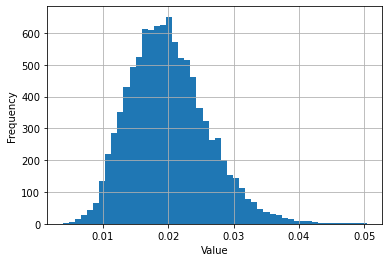

In [10]:
x1 = srd_euler()
plt.hist(x1[-1], bins=50)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)

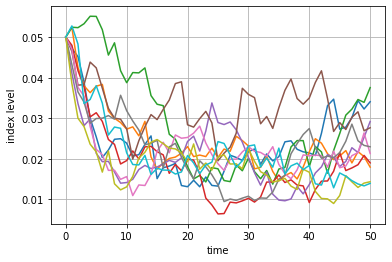

In [12]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
#Downward drift since theta < x0